In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from google.cloud import bigquery
!pip install db-dtypes
!pip install google-cloud-bigquery
!pip install google-cloud-bigquery-storage
from tensorflow.keras.utils import to_categorical

2025-06-03 15:11:36.902166: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-03 15:11:36.903044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 15:11:36.907592: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 15:11:36.918913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748959896.934950   30172 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748959896.94

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
def get_data_from_bq(
        gcp_project:str,
        query:str,
        data_has_header=True
    ) -> pd.DataFrame:
    """
    Retrieve `query` data from BigQuery
    """
    client = bigquery.Client(project=gcp_project)
    query_job = client.query(query)
    result = query_job.result()
    df = result.to_dataframe()
    df = df.astype("float64")
    return df

GCP_PROJECT = "skin-scan-461716"
BQ_DATASET = "skin_scan"

query = f"""
        SELECT *
        FROM `{GCP_PROJECT}`.{BQ_DATASET}.train_28x28
    """

data = get_data_from_bq(f"{GCP_PROJECT}", query)

In [3]:
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,179.0,138.0,169.0,180.0,137.0,169.0,182.0,139.0,169.0,186.0,...,189.0,161.0,192.0,189.0,161.0,189.0,187.0,157.0,183.0,4.0
1,139.0,74.0,78.0,148.0,80.0,85.0,160.0,91.0,99.0,170.0,...,9.0,8.0,8.0,15.0,14.0,16.0,21.0,18.0,22.0,4.0
2,65.0,41.0,57.0,130.0,95.0,115.0,173.0,136.0,161.0,187.0,...,20.0,9.0,18.0,19.0,10.0,19.0,17.0,10.0,17.0,4.0
3,201.0,159.0,176.0,207.0,155.0,174.0,207.0,150.0,163.0,207.0,...,83.0,86.0,138.0,104.0,101.0,161.0,117.0,102.0,156.0,6.0
4,229.0,188.0,208.0,237.0,191.0,216.0,235.0,179.0,195.0,233.0,...,106.0,105.0,168.0,131.0,122.0,193.0,142.0,121.0,184.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,26.0,17.0,27.0,52.0,38.0,51.0,47.0,32.0,45.0,38.0,...,37.0,24.0,36.0,54.0,37.0,51.0,41.0,28.0,41.0,2.0
10011,183.0,119.0,145.0,213.0,146.0,177.0,222.0,146.0,181.0,224.0,...,227.0,126.0,173.0,228.0,122.0,160.0,224.0,96.0,118.0,1.0
10012,245.0,129.0,140.0,247.0,129.0,142.0,248.0,132.0,139.0,248.0,...,234.0,129.0,131.0,230.0,122.0,127.0,226.0,120.0,122.0,4.0
10013,253.0,168.0,182.0,254.0,171.0,185.0,254.0,164.0,180.0,254.0,...,247.0,175.0,167.0,244.0,171.0,163.0,243.0,172.0,163.0,4.0


In [9]:
X = data.drop('label', axis=1)

In [10]:
y = data['label']

In [11]:
X = X.values / 255.0 
X = X.reshape(-1, 28, 28, 3)  


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)





In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()



/home/vedutla/.pyenv/versions/3.12.9/envs/skin_scan_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-03 15:12:38.087858: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,223 (879.78 KB)

 Trainable params: 225,223 (879.78 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=32)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6566 - loss: 1.1703 - val_accuracy: 0.6680 - val_loss: 0.9365
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6866 - loss: 0.9334 - val_accuracy: 0.6780 - val_loss: 0.8841
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6819 - loss: 0.9091 - val_accuracy: 0.6815 - val_loss: 0.8640
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6919 - loss: 0.8583 - val_accuracy: 0.6960 - val_loss: 0.8231
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6981 - loss: 0.8363 - val_accuracy: 0.7054 - val_loss: 0.7924
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7079 - loss: 0.7995 - val_accuracy: 0.7124 - val_loss: 0.7941
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7075 - loss: 0.7992 - val_accuracy: 0.7224 - val_loss: 0.7604
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7176 - loss: 0.7682 - val_accuracy: 0.

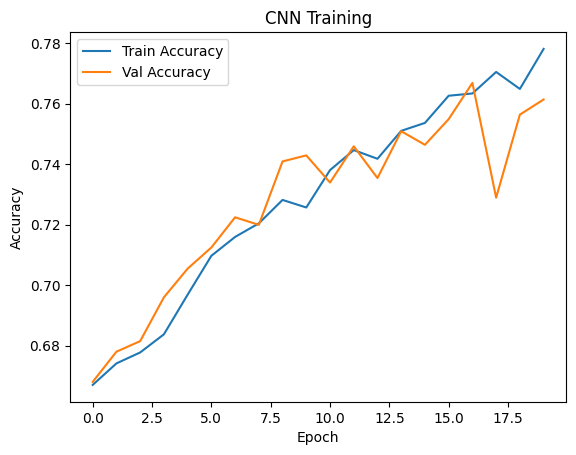

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
